# 第四章 神经网络的学习
##### 这里所说的学习是指 是指从训练数据中自动获取最优参数的过程 学习的目的就是一损失函数为基准 找出能使他的值达到最小的损失函数
神经网络是与处理的问题无关 可以将数据作为原始数据进行端对端的学习
泛化能力指的是 模型在未被观察到的数据上的能力 获得泛化能力是机器学习的最终目标  只对某个数据集的过渡拟合称为过拟合
神经网络以某个指标为线索寻找最优权重参数 所使用的指标称为损失函数 损失函数时表示神经网络性能的恶劣程度的指标 即当前的神经网络对监督数据在多大程度上不拟合
可以用作损失函数的函数有很多最有名的是均方误差

In [2]:
# 均方误差
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
loss = mean_squared_error(np.array(y), np.array(t))
print(loss)
#第二种情况
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6,0.0, 0.0]
loss = mean_squared_error(np.array(y), np.array(t))
print(loss)

0.09750000000000003
0.5975


#### 交叉熵损失函数
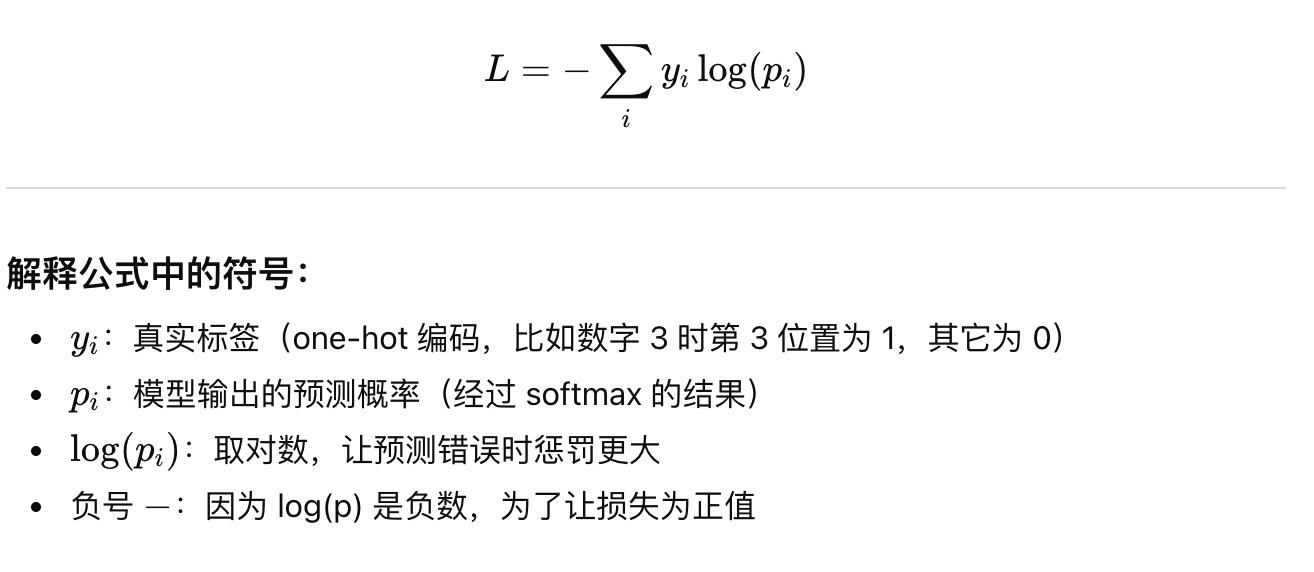

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return - np.sum(t * np.log(y + delta))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
loss = cross_entropy_error(np.array(y), np.array(t))
print(loss)

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
loss = cross_entropy_error(np.array(y), np.array(t))
print(loss)

0.510825457099338
2.302584092994546


In [7]:
#4.2.3 mini-batch 学习
#先 读入数据
import numpy as np
import struct

def load_images(path):
    with open(path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num, rows, cols)

def load_labels(path):
    with open(path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

train_images = load_images("../3/data/train-images-idx3-ubyte")
train_labels = load_labels("../3/data/train-labels-idx1-ubyte")
test_images = load_images("../3/data/t10k-images-idx3-ubyte")
test_labels = load_labels("../3/data/t10k-labels-idx1-ubyte")

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
#对数据进行简单的处理
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
print(train_images_flat.shape)
print(test_images_flat.shape)

(60000, 784)
(10000, 784)


In [11]:
print(test_labels.shape, train_labels.shape)
train_label_onehot = np.eye(10)[train_labels]
test_label_onehot = np.eye(10)[test_labels]
print(train_label_onehot.shape)
print(test_label_onehot.shape)

(10000,) (60000,)
(60000, 10)
(10000, 10)


In [13]:
# 如何实现随机抽取呢
train_size = train_label_onehot.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
train_images = train_images_flat[batch_mask]
train_labels = train_label_onehot[batch_mask]
print(train_images.shape, train_labels.shape)

(10, 784) (10, 10)


In [16]:
 #mini batch版交叉熵误差的实现
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + delta))/ batch_size

#这里不太好理解 需要再注意一下

In [21]:
#4.4 梯度
# 由全部变量的偏导数汇总而成的向量称为梯度
# 实现
def f(x):
    return np.sum(np.square(x))

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)#生成和x形状相同的数组

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

print(numerical_gradient(f, np.array([3.0,4.0])))


[6. 8.]


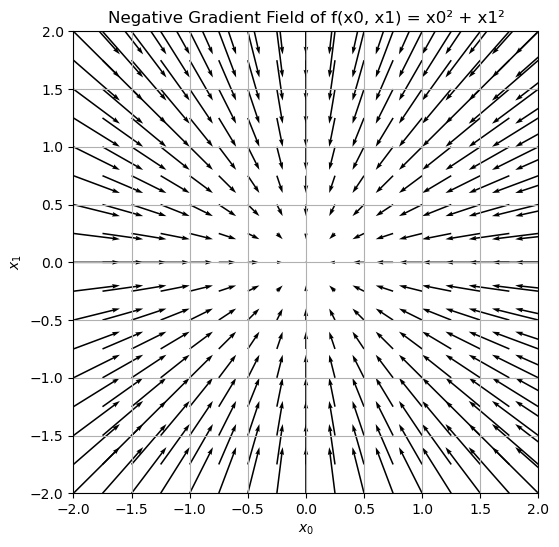

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f(x):
    return np.sum(x**2)

# 数值求梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

# -------- 绘制梯度场 --------
x0 = np.arange(-2.0, 2.5, 0.25)
x1 = np.arange(-2.0, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

# 计算每个点的梯度（注意f接受一个向量x）
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        grad = numerical_gradient(f, np.array([X[i, j], Y[i, j]]))
        U[i, j] = -grad[0]  # 负梯度：下降方向
        V[i, j] = -grad[1]

# 绘制箭头场（矢量场）
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, color="black", angles="xy", scale_units="xy", scale=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid(True)
plt.title("Negative Gradient Field of f(x0, x1) = x0² + x1²")
plt.show()


In [27]:
#梯度下降法
def f(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad
def gradient_descent(f, init_x, lr = 0.1, steps = 100):
    x = init_x
    for i in range(steps):
        grad = numerical_gradient(f, x)
        x = x - lr * grad
        print(x)
    return x
init_x = np.array([-3.0, 4.0])
final_x = gradient_descent(f, init_x)
print(final_x)

[-2.4  3.2]
[-1.92  2.56]
[-1.536  2.048]
[-1.2288  1.6384]
[-0.98304  1.31072]
[-0.786432  1.048576]
[-0.6291456  0.8388608]
[-0.50331648  0.67108864]
[-0.40265318  0.53687091]
[-0.32212255  0.42949673]
[-0.25769804  0.34359738]
[-0.20615843  0.27487791]
[-0.16492674  0.21990233]
[-0.1319414   0.17592186]
[-0.10555312  0.14073749]
[-0.08444249  0.11258999]
[-0.06755399  0.09007199]
[-0.0540432   0.07205759]
[-0.04323456  0.05764608]
[-0.03458765  0.04611686]
[-0.02767012  0.03689349]
[-0.02213609  0.02951479]
[-0.01770887  0.02361183]
[-0.0141671   0.01888947]
[-0.01133368  0.01511157]
[-0.00906694  0.01208926]
[-0.00725355  0.00967141]
[-0.00580284  0.00773713]
[-0.00464228  0.0061897 ]
[-0.00371382  0.00495176]
[-0.00297106  0.00396141]
[-0.00237684  0.00316913]
[-0.00190148  0.0025353 ]
[-0.00152118  0.00202824]
[-0.00121694  0.00162259]
[-0.00097356  0.00129807]
[-0.00077884  0.00103846]
[-0.00062308  0.00083077]
[-0.00049846  0.00066461]
[-0.00039877  0.00053169]
[-0.00031901  0.

In [29]:
def softmax(a):
    if a.ndim == 2:  # batch
        c = np.max(a, axis=1, keepdims=True)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a, axis=1, keepdims=True)
        y = exp_a / sum_exp_a
    else:  # 单样本
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
    return y

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)#用高斯分布进行初始化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss


In [34]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])
print(net.loss(x, t))

[[-0.06039807  0.49398884  0.8429476 ]
 [-1.05891952  1.34900409 -0.8894218 ]]
[-0.98926641  1.51049699 -0.29471106]
1
5.660650008678611


In [ ]:
#接下来就可以求解梯度了


### 接下来就是系统完整的实现一个两层的神经网络了 比较多我放在py文件里面了